In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [5]:
df= pd.read_csv(r"C:\Users\jainv\OneDrive\Desktop\Spotify Most Streamed Songs.csv")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [7]:
df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,https://i.scdn.co/image/ab67616d0000b2730f5397...
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,https://i.scdn.co/image/ab67616d0000b273e0b60c...
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,Not Found
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,Not Found
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,E,Minor,61,32,67,15,0,11,5,https://i.scdn.co/image/ab67616d0000b273992a1f...


In [9]:
df.shape

(953, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [13]:
duplicates= df.duplicated().sum()
print(duplicates)

0


In [15]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [17]:
missing_values= df.isnull().sum()
print(missing_values)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64


In [63]:
#univariate analysis 
dat = df["released_year"]

In [21]:
dat.describe()

count     953.000000
mean     2018.238195
std        11.116218
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64

In [23]:
Q1 = dat.quantile(0.25)
Q3 = dat.quantile(0.75)

IQR = Q3 - Q1

In [25]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)
print('IQR:', IQR)
print('Q1:', Q1)
print('Q3:', Q3)

Lower Bound: 2017.0
Upper Bound: 2025.0
IQR: 2.0
Q1: 2020.0
Q3: 2022.0


In [27]:
outliers = dat[(dat < lower_bound) | (dat > upper_bound)]

In [29]:
outliers

22     2013
37     2014
38     2014
47     2016
48     2016
       ... 
902    2013
910    2002
911    2000
914    2016
922    1982
Name: released_year, Length: 151, dtype: int64

In [31]:
print("Number of outliers: ", outliers.shape[0])
print("Percentage of outliers: ", (outliers.shape[0]/dat.shape[0])*100)

Number of outliers:  151
Percentage of outliers:  15.844700944386151


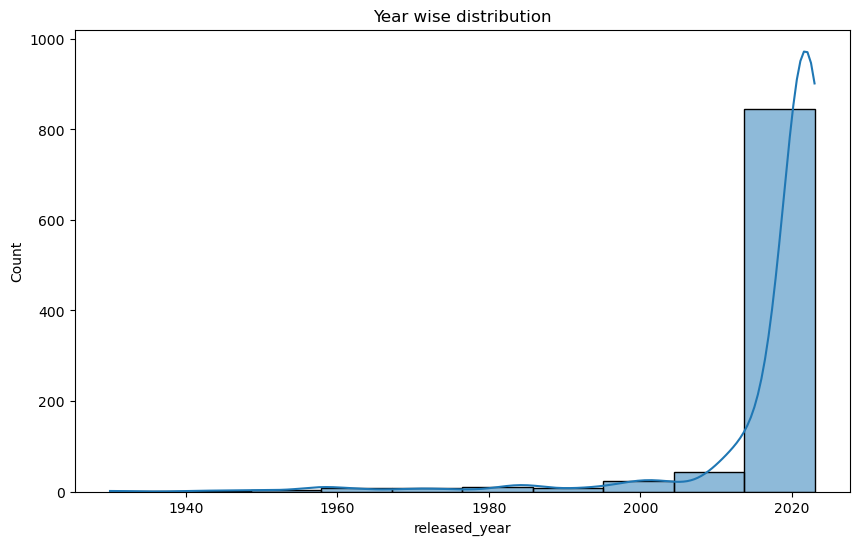

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(dat, kde=True, bins=10)
plt.title('Year wise distribution')
plt.show()

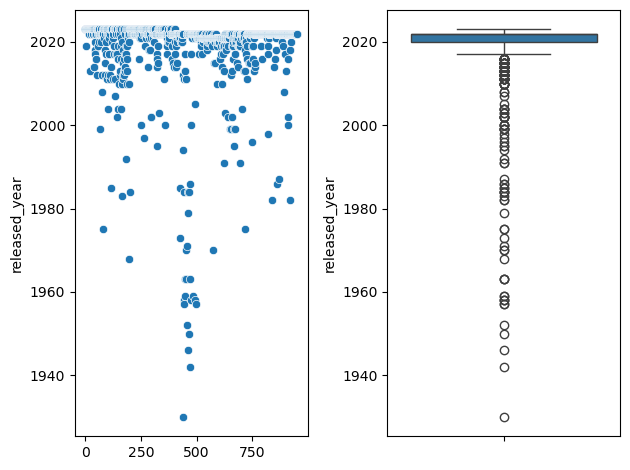

In [35]:
plt.subplot(1, 2, 1)
sns.scatterplot(dat)
plt.subplot(1, 2, 2)
sns.boxplot(dat)
plt.tight_layout()
plt.show()

In [37]:
dat = dat[(dat > lower_bound) & (dat < upper_bound)]
print(df.shape)

(953, 25)


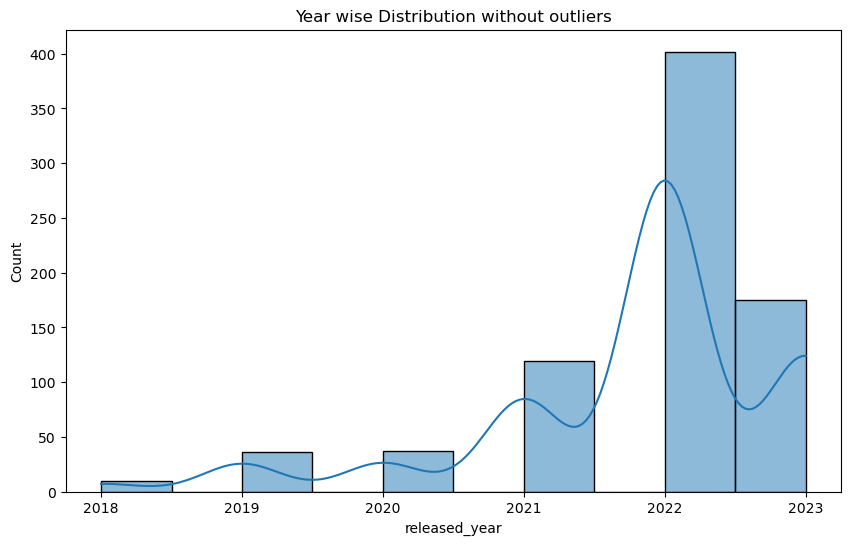

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(dat, kde=True, bins=10)
plt.title('Year wise Distribution without outliers')
plt.show()

In [41]:
z_scores = stats.zscore(dat)
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
print("Number of outliers: ", outliers.sum())
print("Number of outliers: ", np.count_nonzero(outliers))

Number of outliers:  10
Number of outliers:  10


<Axes: xlabel='released_year', ylabel='Count'>

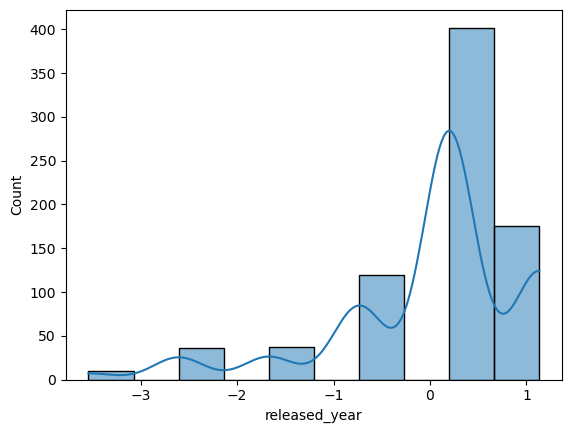

In [43]:
sns.histplot(z_scores, kde=True, bins=10)

In [65]:
#bivariate analysis 
df = df.loc[:, ['released_year', 'in_spotify_playlists']]

In [47]:
print(df.duplicated())
print(df.isna().sum())

df.describe()

0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950     True
951    False
952     True
Length: 953, dtype: bool
released_year           0
in_spotify_playlists    0
dtype: int64


,released_year,in_spotify_playlists
count,953.000000,953.000000
mean,2018.238195,5200.124869
std,11.116218,7897.608990
min,1930.000000,31.000000
25%,2020.000000,875.000000
50%,2022.000000,2224.000000
75%,2022.000000,5542.000000
max,2023.000000,52898.000000


In [49]:
df.corr()

,released_year,in_spotify_playlists
released_year,1.000000,-0.392204
in_spotify_playlists,-0.392204,1.000000


In [53]:
f_statistic, p_value = stats.f_oneway(df['released_year'], df['in_spotify_playlists'])
print('F statistic:', f_statistic)
print('P value:', p_value)


F statistic: 154.69283529801083
P value: 3.3505937002055796e-34


<Axes: xlabel='released_year', ylabel='in_spotify_playlists'>

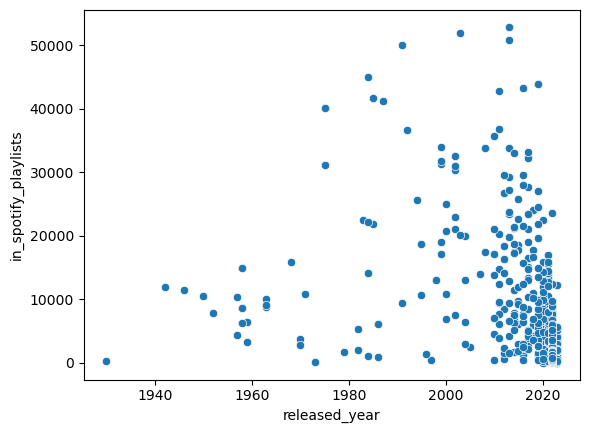

In [55]:
sns.scatterplot(x='released_year', y='in_spotify_playlists', data=df)